In [1]:
#Background: 
#Company wants uild a machine learning model to predict the selling prices of houses; 
#Based on a variety of features on which the value of the house is evaluated.

In [2]:
#Objective:
#The task is to build a model that will predict the price of a house based on features provided in the dataset.

In [3]:
#Data
#Information on some  22000 properties
#Dataset of historic data of house sold between May 2014 to May 2015
#Variables: ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', sqft_living15', 'sqft_lot15', 'price']


In [4]:
#Import Lib
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
import pickle

In [5]:
#Import the data
data = pd.read_excel('C:/Users/Usuario/Ironhack_Irina/MID_Bootcamp_project/MID_Bootcamp_Project/regression_data.xls')

In [6]:
#Estructura y naturaleza de los datos, primeras 5 filas 
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000  

[5 rows x 21 columns]

In [7]:
#Information variables
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [9]:
#Load Columns information
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
#Resumen de los datos 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [10]:
#Estadisticas iniciales de los datos
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [11]:
#Target is price of house 

In [ ]:
#***Data cleaning*** 

In [12]:
#Verificar y gestionar valores perdidos o vacios
data.isnull().sum()
#No se evidencian valores perdidos o vacios aparentes

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [13]:
#Eliminar filas que contienen que faltan y se verifican que  los datos sean adecuados para el modelo de regresion
data2 = data.dropna()

In [14]:
#Se comprueba que no existan los valores perdidos con el valor medio de la columna correspondiente
#Para que los datos se encuentren adeucados para el modelo de regresion Imputar los valores que faltan con la media o la mediana de la columna
data2 = data.fillna(data.mean())
data2 = data.fillna(data.median())

In [15]:
#Se idenfican si existen valores en las filas duplicados
duplicated_rows = data2.duplicated().sum()
#Se verifica el numero actual de valires duplicados 
print('Values of duplicated rows:', duplicated_rows)
#Commo no hay numero duplicados, no se realiza manejo

Values of duplicated rows: 0


In [16]:
#Se procede a comprobar las variables categoricas 'Object'
categorical_cols = data2.select_dtypes(include=['object']).columns
print("Categorical columns: ", categorical_cols)

Categorical columns:  Index([], dtype='object')


In [17]:
#SE procede a tratar la variable date para convertirla a numerica
#Se selecciona la columna
date_col = 'date'

#se convierte la columna date into  pandas datetime object
data2[date_col] = pd.to_datetime(data2[date_col])

#se extraen losd atos del mes, a;o, y dia de la variable date object
data2['year'] = data2[date_col].dt.year
data2['month'] = data2[date_col].dt.month
data2['day'] = data2[date_col].dt.day

# Drop the original date column
data2 = data2.drop(date_col, axis=1)

In [18]:
#Verifico la informacion actualmente de la data para verificar que no existan ese tipo de variables
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [19]:
# Select the numerical columns
datacol_num = data2.select_dtypes(include=['float64', 'int64'])

In [20]:
datacol_num


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
0               0     0          3      7  ...             0    98178   
1               0     0          3      7  ...          1991    98125   
2               0     0          3      6  ...             0    98028   
3               0     0          5      7  ...             0    98136   
4               0     0          3      8  ...             0    98074   
...           ...   ...        ...    ...  ...           ...      ...   
21592           0     0          3      8  ...             0    98103   
21593           0     0          3      8  ...             0    98146   
21594           0     0          3      7  ...             0    98144   
21595           0     0          3      8  ...             0    98027   
21596           0     0          3      7  ...             0    98144   

           lat     long  sqft_living15  sqft_lot15   price  year  month  day  
0      47.5112 -122.257           1340        5650  221900  2014     10   13  
1      47.7210 -122.319           1690        7639  538000  2014     12    9  
2      47.7379 -122.233           2720        8062  180000  2015      2   25  
3      47.5208 -122.393           1360        5000  604000  2014     12    9  
4      47.6168 -122.045           1800        7503  510000  2015      2   18  
...        ...      ...            ...         ...     ...   ...    ...  ...  
21592  47.6993 -122.346           1530        1509  360000  2014      5   21  
21593  47.5107 -122.362           1830        7200  400000  2015      2   23  
21594  47.5944 -122.299           1020        2007  402101  2014      6   23  
21595  47.5345 -122.069           1410        1287  400000  2015      1   16  
21596  47.5941 -122.299           1020        1357  325000  2014     10   15  

[21597 rows x 23 columns]

In [21]:
datacol_num.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day'],
      dtype='object')

In [22]:
datacol_num.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
year               int64
month              int64
day                int64
dtype: object

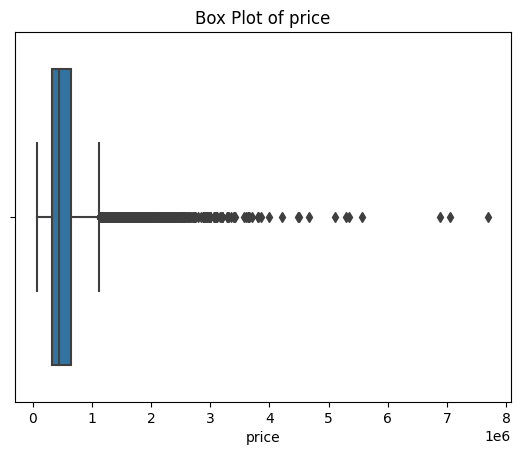

In [23]:
# Selecciono una sola columna para graficar una variable numerica como ejemplo price of the house
col = 'price'

# Creo a box plot
sns.boxplot(x=data2[col])

# Aagregar l titulo de los niveles 
plt.title("Box Plot of " + col)
plt.xlabel(col)

plt.show()

<AxesSubplot: xlabel='price', ylabel='Density'>

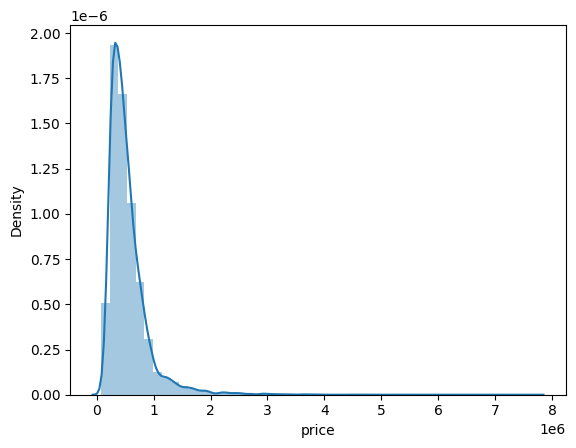

In [24]:
# Se trabajan con las variables numericas de la data 
sns.distplot(datacol_num['price'])

In [25]:
#Se procede a analisis exploratorio de los datos 

In [26]:
#***Analisis exploratorio datos***

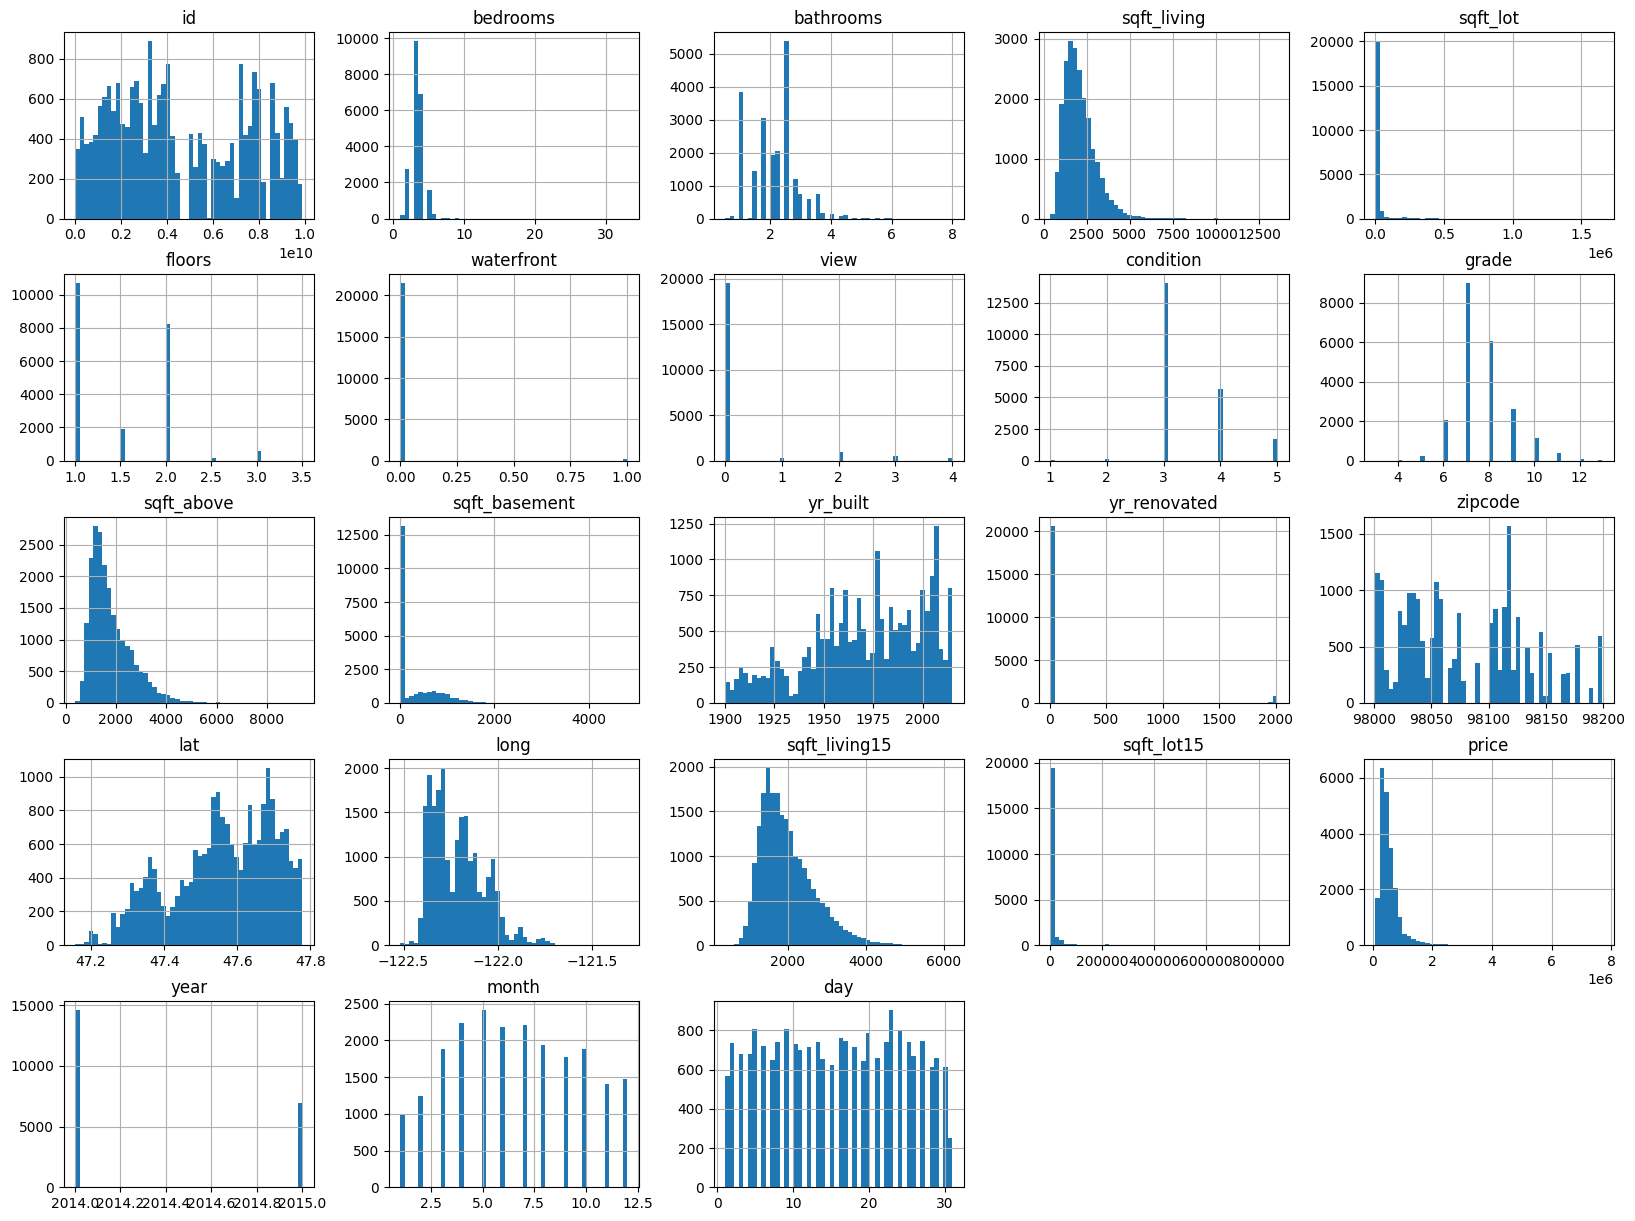

In [27]:
#Plot un histograma de las columnas con variables numericas 
datacol_num.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
#Las variables con tendencia a la normalidad son las relacioandas al precio de la casa y caracteristas de ubicacion de la casa,tama;o de ciertas areas de la casa, 
#El area de ba;os y habitaciones presenta impacto a otras variables pero no directamente al precio 

<AxesSubplot: >

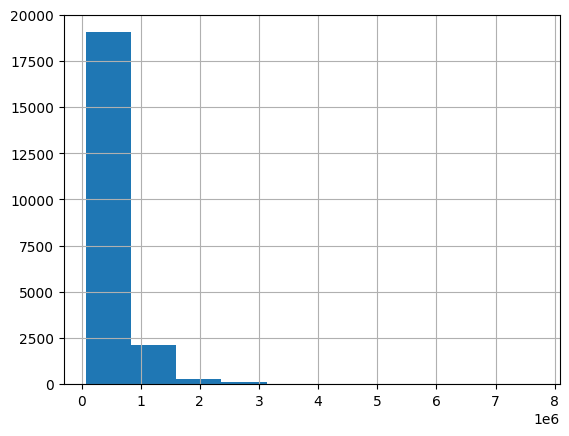

In [29]:
#Plot un histograma del target 
datacol_num['price'].hist()

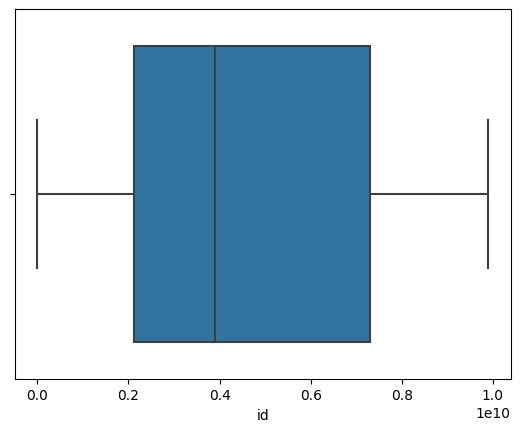

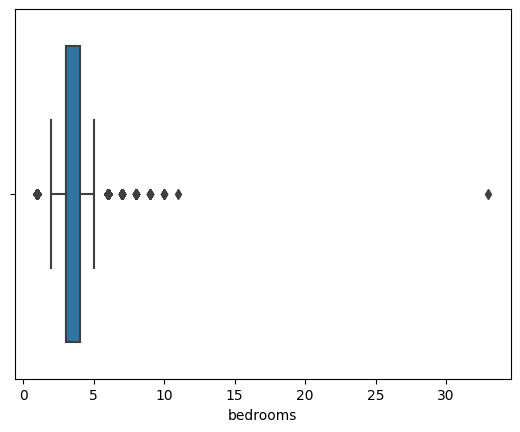

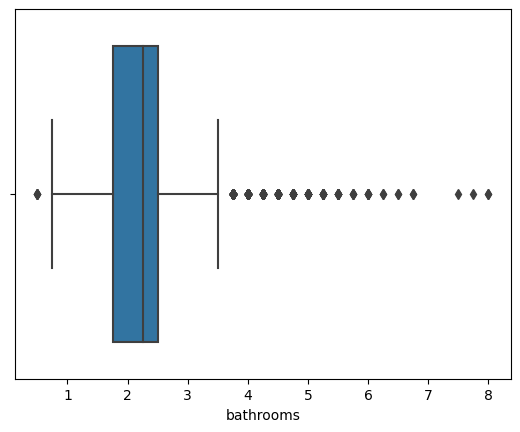

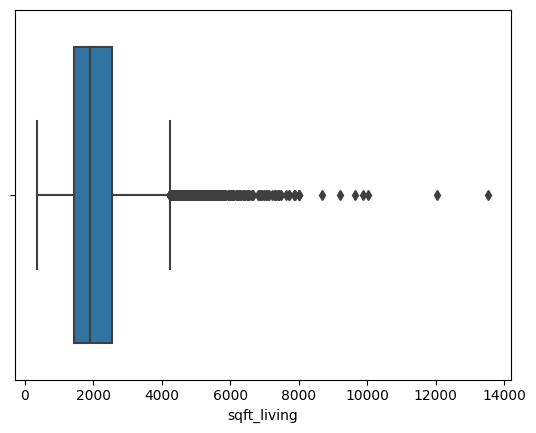

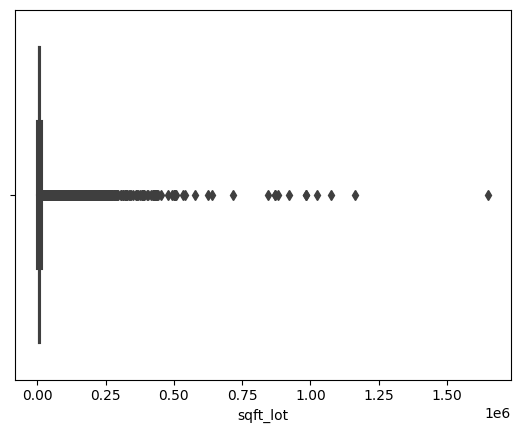

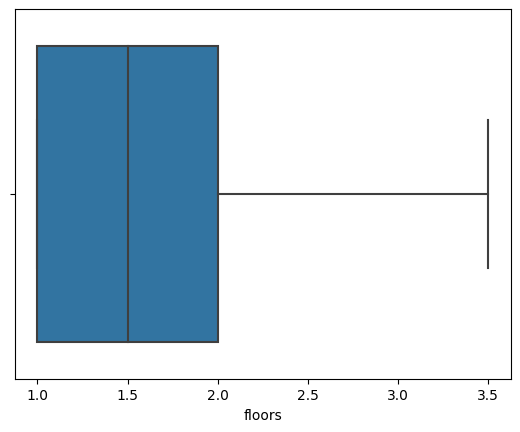

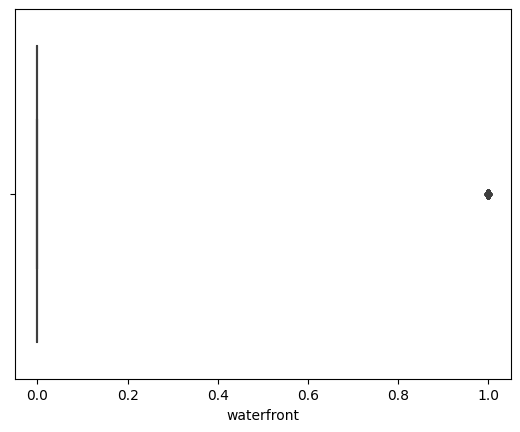

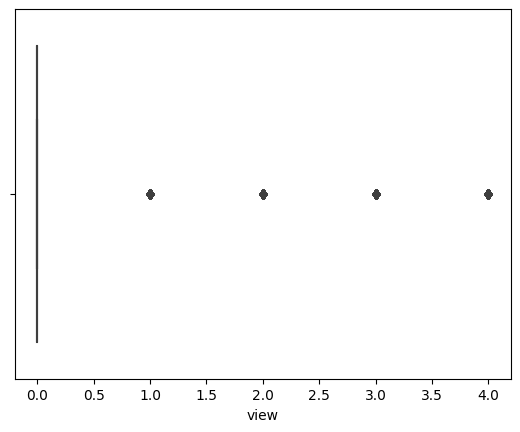

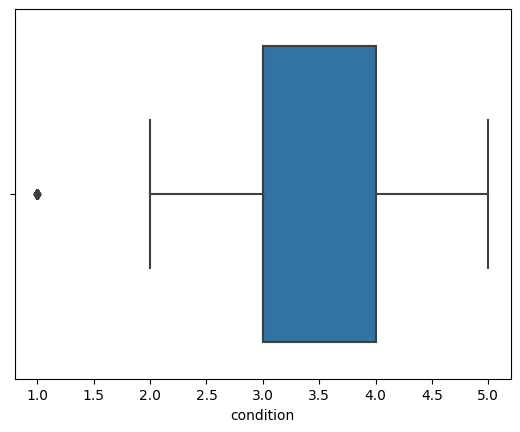

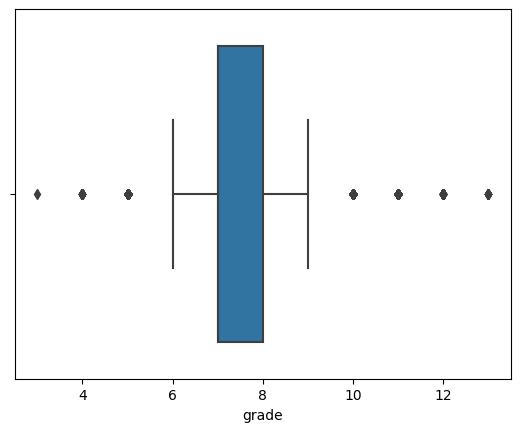

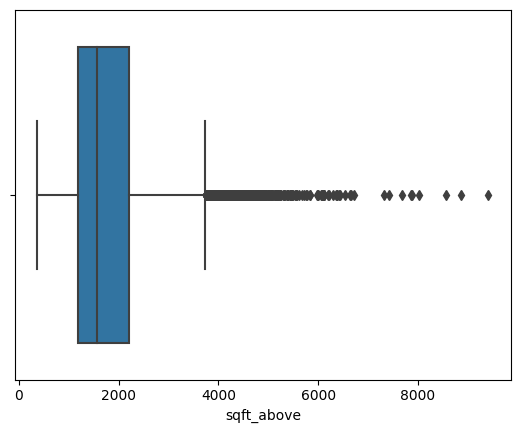

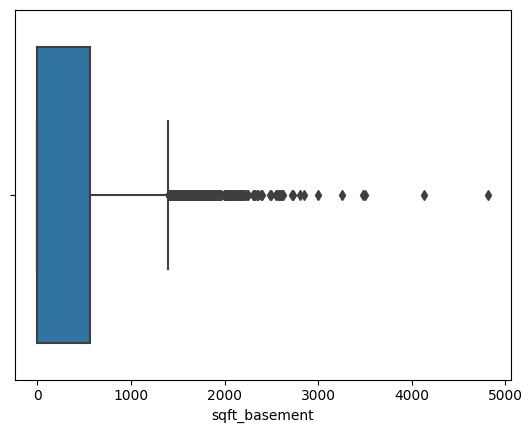

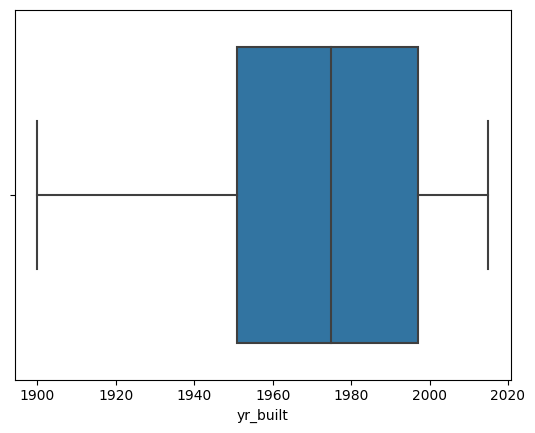

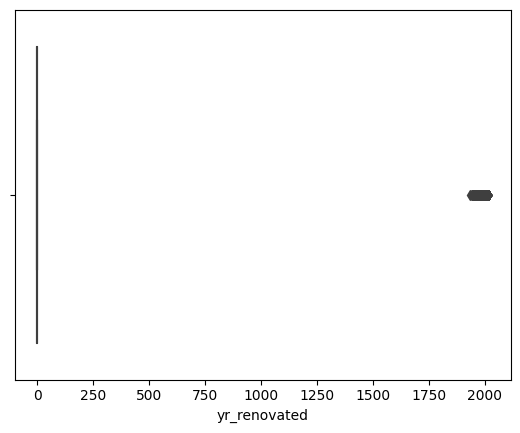

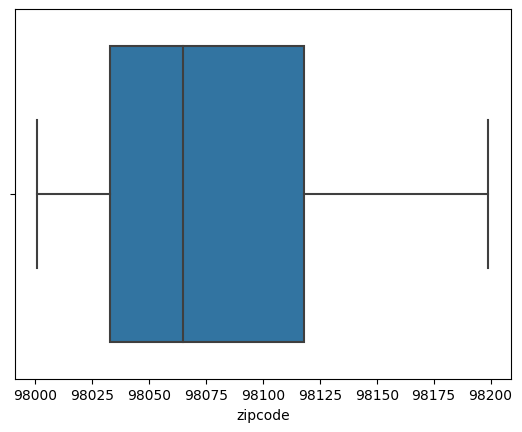

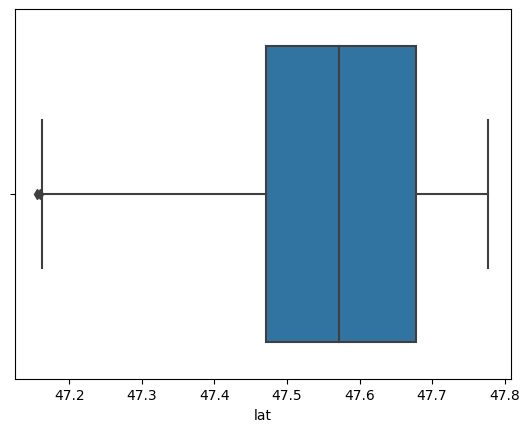

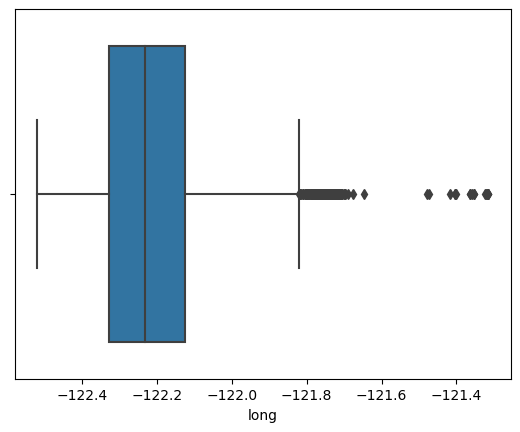

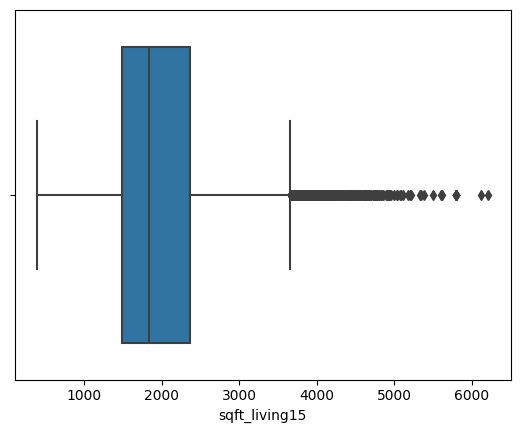

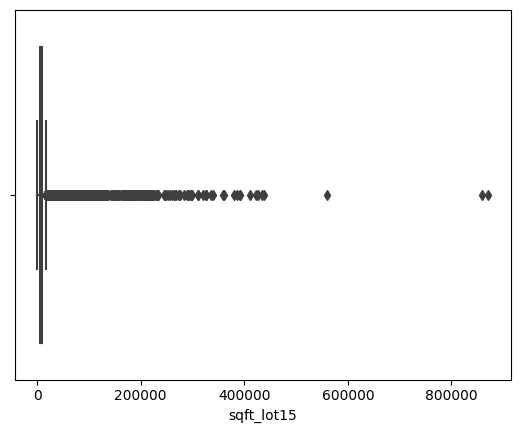

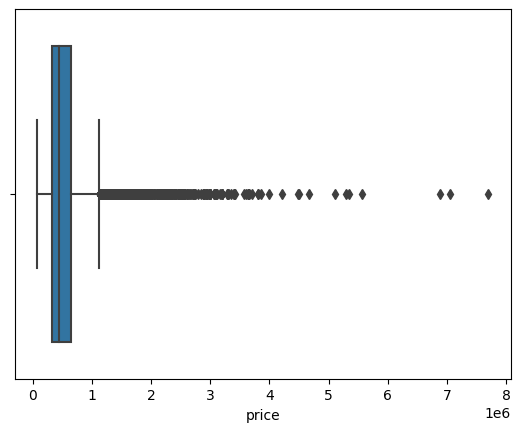

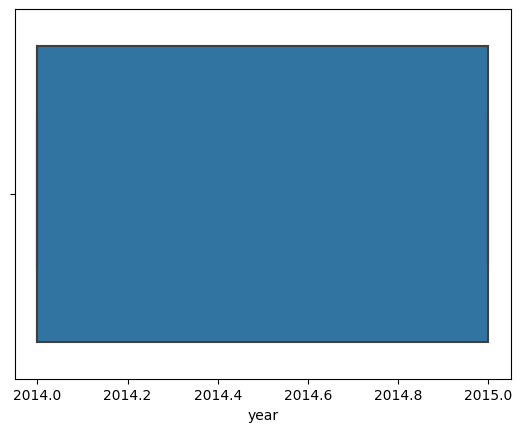

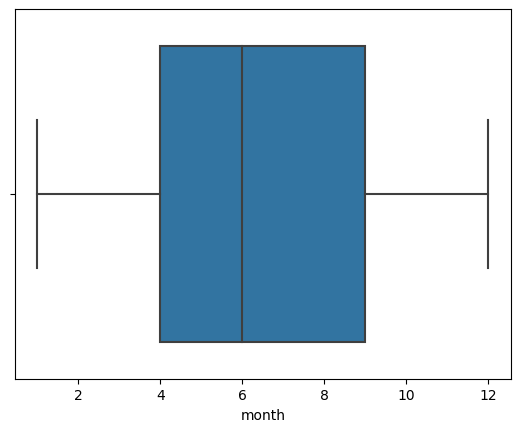

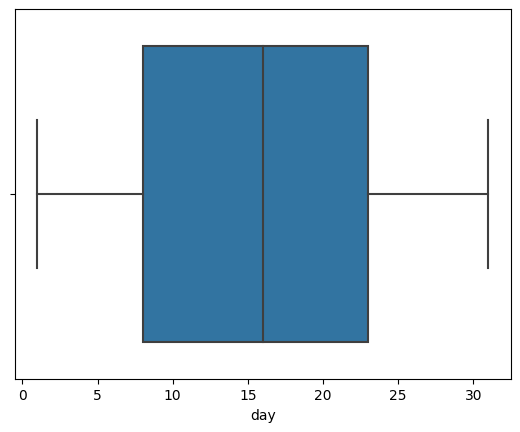

In [30]:
# Create a boxplot for each numerical column
for col in datacol_num.columns:
    sns.boxplot(x=datacol_num[col])
    plt.show()

In [31]:
#Se identifican outlier en algunas variables, 
#se intenta retirar outliers pero en estos momentos hacen que los valores cambien o desaparezcan 

In [32]:
datacol_num

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
0               0     0          3      7  ...             0    98178   
1               0     0          3      7  ...          1991    98125   
2               0     0          3      6  ...             0    98028   
3               0     0          5      7  ...             0    98136   
4               0     0          3      8  ...             0    98074   
...           ...   ...        ...    ...  ...           ...      ...   
21592           0     0          3      8  ...             0    98103   
21593           0     0          3      8  ...             0    98146   
21594           0     0          3      7  ...             0    98144   
21595           0     0          3      8  ...             0    98027   
21596           0     0          3      7  ...             0    98144   

           lat     long  sqft_living15  sqft_lot15   price  year  month  day  
0      47.5112 -122.257           1340        5650  221900  2014     10   13  
1      47.7210 -122.319           1690        7639  538000  2014     12    9  
2      47.7379 -122.233           2720        8062  180000  2015      2   25  
3      47.5208 -122.393           1360        5000  604000  2014     12    9  
4      47.6168 -122.045           1800        7503  510000  2015      2   18  
...        ...      ...            ...         ...     ...   ...    ...  ...  
21592  47.6993 -122.346           1530        1509  360000  2014      5   21  
21593  47.5107 -122.362           1830        7200  400000  2015      2   23  
21594  47.5944 -122.299           1020        2007  402101  2014      6   23  
21595  47.5345 -122.069           1410        1287  400000  2015      1   16  
21596  47.5941 -122.299           1020        1357  325000  2014     10   15  

[21597 rows x 23 columns]

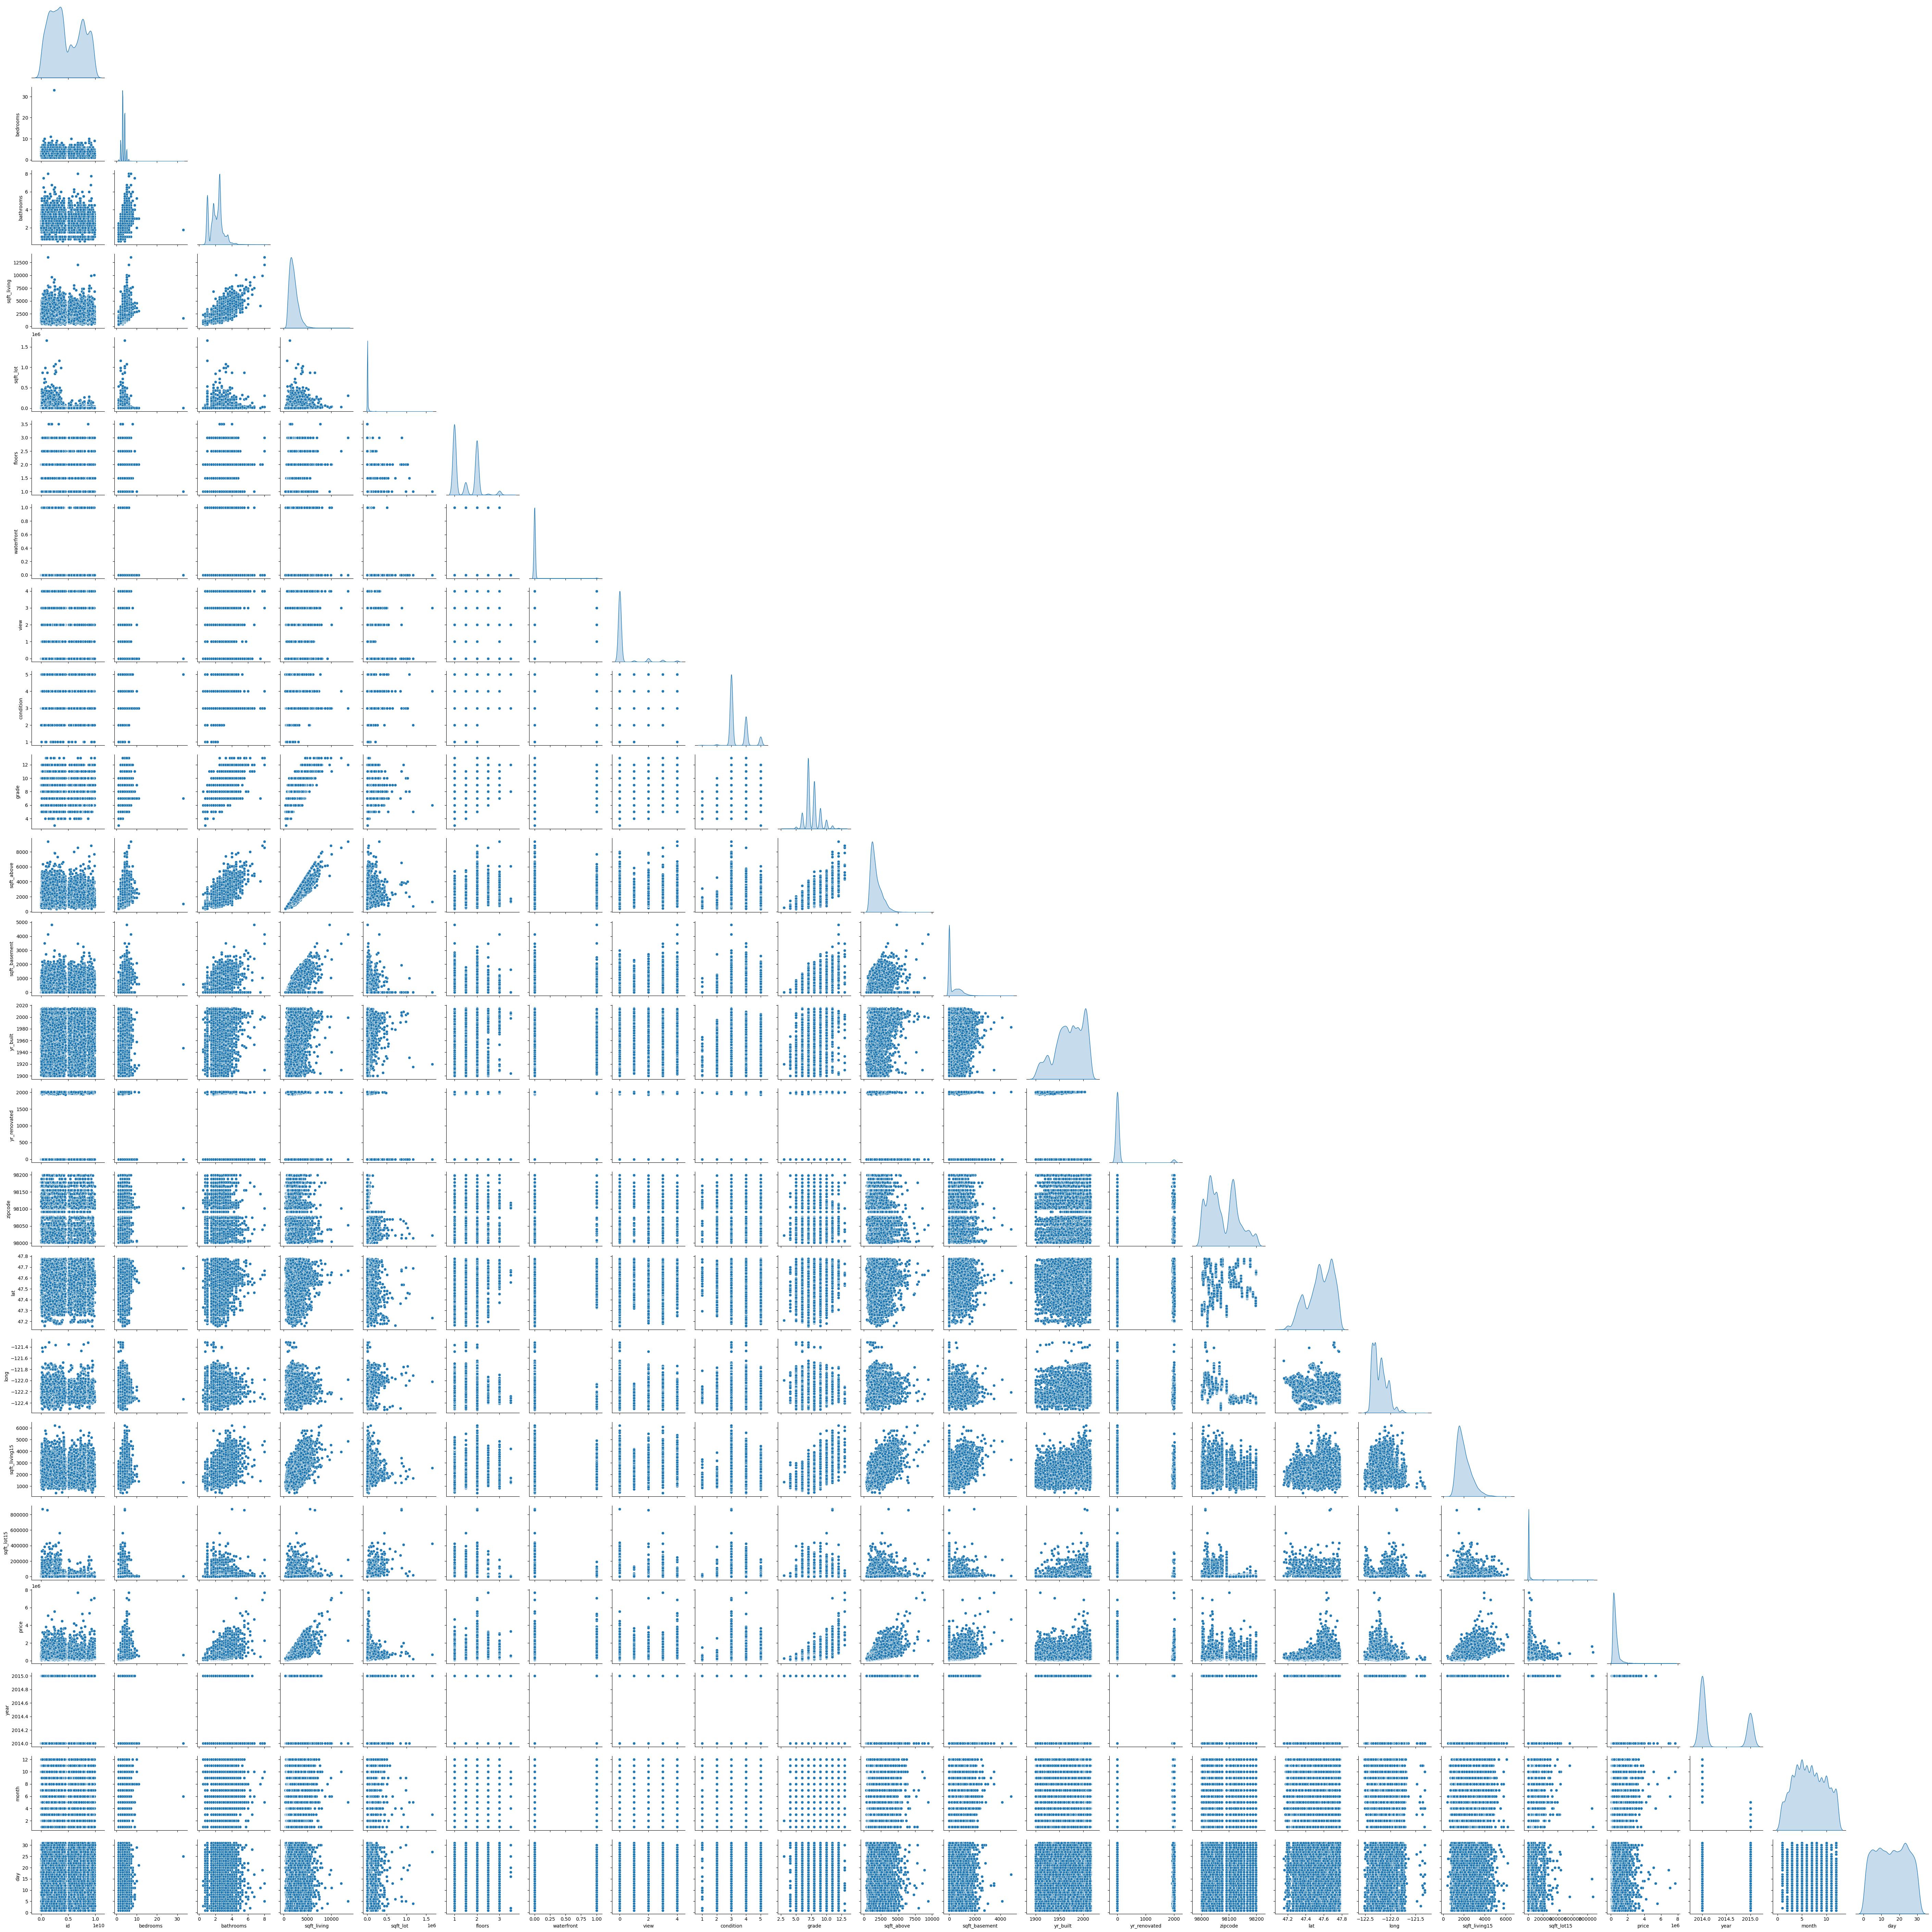

In [33]:
#Plot un diagrama de dispersion y relacion cruzada entre las variables 
sns.pairplot(datacol_num, diag_kind='kde', corner=True)

In [34]:
#Algunas variables tienen dispersion con tendencia lineal, lo que nos orienta para la creacion del modelo


In [35]:
#Se procede a verificar una correlacion inicial de las variables para determinar aquellas variables con mayor correlacion con el precio de las viviendas 

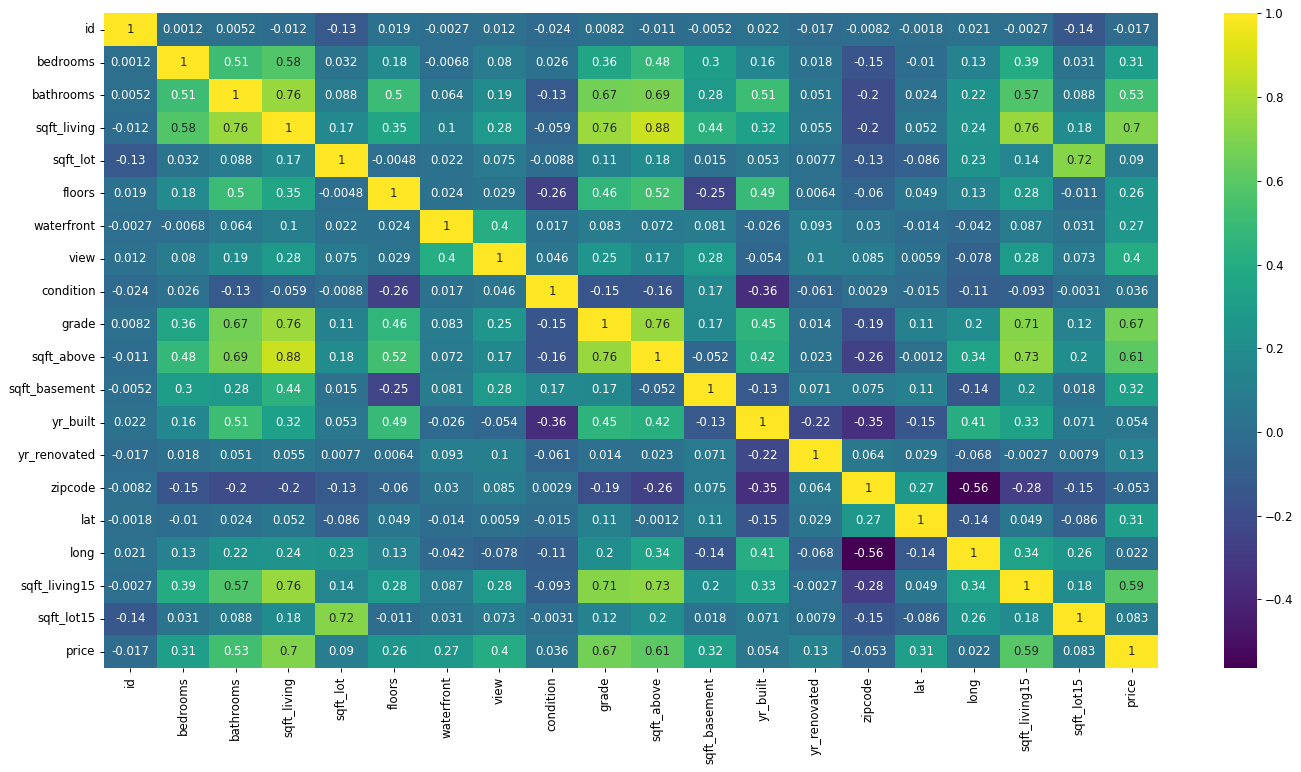

In [36]:
#Calculando la matrix de correlacion inicial de todas las variables 
plt.figure(figsize=(20,10),dpi =85)
corr_matrix = datacol_num.corr()
#Plot un heatmap de la matrit de correlacion 
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [37]:
# Deteermino por los valores por encima de 0.6 un filtro 
threshold = 0.6

In [38]:
# Filter con el threshold 
strong_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)].dropna(how='all', axis=0).dropna(how='all', axis=1)

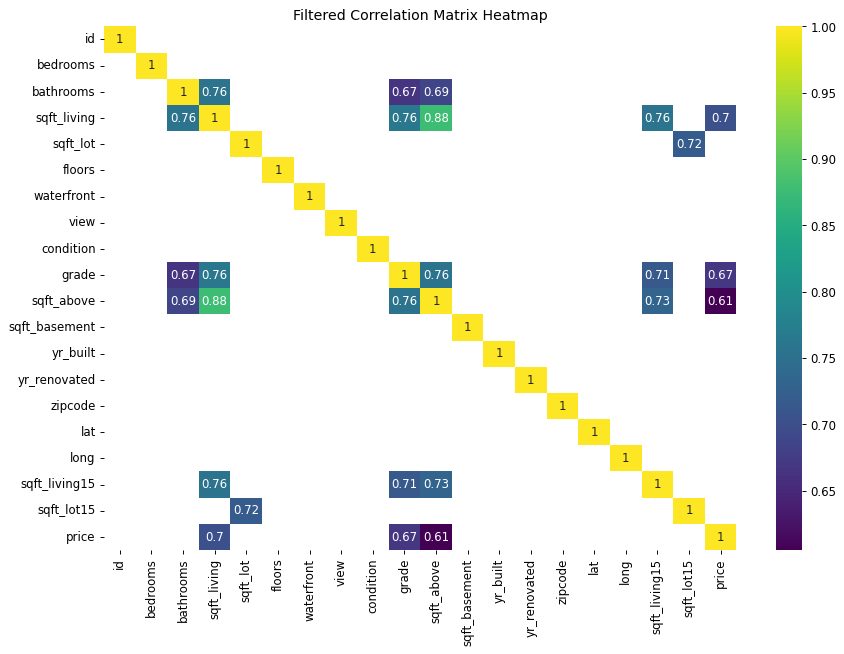

In [39]:
# Plot a heatmap of the filtered correlations using seaborn
plt.figure(figsize=(12,8),dpi =85)
sns.heatmap(strong_corr, annot=True, cmap='viridis')
plt.title('Filtered Correlation Matrix Heatmap')
plt.show()

In [40]:
#Para este resultado se identifica que las variables mas correlacionadles entre si son sqft_living, grade, sqft_above con el  price de las casas. 
#Lo cual estaria relacionado a que los clientes compraron casas basandose en el area de estar o social, clasificacion que se le habia otorgado a la vivienda, 
#en relacion al area de la casa sin incluir el sotano. 
#Otras variables tambien se  impactan entre si como son el numero de ba;os, area social, y el area total de la propiedad, calsificacion y area de la casa sin el sotano.
#Existe una variabale relacionada con el tiempo de renovacion que puede estar o no afectada por el a;o en que se realizo la renovacion 

In [41]:
#buscar la correlacion de las variables con los altos precios de las casas 
corr_matrix[corr_matrix["price"]>0.60]

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
sqft_living -0.012241  0.578212   0.755758     1.000000  0.173453  0.353953   
grade        0.008188  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above  -0.010799  0.479386   0.686668     0.876448  0.184139  0.523989   
price       -0.016772  0.308787   0.525906     0.701917  0.089876  0.256804   

             waterfront      view  condition     grade  sqft_above  \
sqft_living    0.103854  0.284709  -0.059445  0.762779    0.876448   
grade          0.082888  0.251728  -0.146896  1.000000    0.756073   
sqft_above     0.072109  0.167609  -0.158904  0.756073    1.000000   
price          0.266398  0.397370   0.036056  0.667951    0.605368   

             sqft_basement  yr_built  yr_renovated   zipcode       lat  \
sqft_living       0.435130  0.318152      0.055308 -0.199802  0.052155   
grade             0.168220  0.447865      0.014261 -0.185771  0.113575   
sqft_above       -0.052156  0.424037      0.023251 -0.261570 -0.001199   
price             0.323799  0.053953      0.126424 -0.053402  0.306692   

                 long  sqft_living15  sqft_lot15     price  
sqft_living  0.241214       0.756402    0.184342  0.701917  
grade        0.200341       0.713867    0.120981  0.667951  
sqft_above   0.344842       0.731767    0.195077  0.605368  
price        0.022036       0.585241    0.082845  1.000000

In [42]:
# Nuevo dataframe con columnas de mayor correlacion para el modelo
# Nuevo DataFrame con columnas con mayor correlación
data3 = datacol_num[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year']]
data3

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131     3.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530              0      2009             0   
21593          3      8        2310              0      2014             0   
21594          3      7        1020              0      2009             0   
21595          3      8        1600              0      2004             0   
21596          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price  year  
0        98178  47.5112 -122.257           1340        5650  221900  2014  
1        98125  47.7210 -122.319           1690        7639  538000  2014  
2        98028  47.7379 -122.233           2720        8062  180000  2015  
3        98136  47.5208 -122.393           1360        5000  604000  2014  
4        98074  47.6168 -122.045           1800        7503  510000  2015  
...        ...      ...      ...            ...         ...     ...   ...  
21592    98103  47.6993 -122.346           1530        1509  360000  2014  
21593    98146  47.5107 -122.362           1830        7200  400000  2015  
21594    98144  47.5944 -122.299           1020        2007  402101  2014  
21595    98027  47.5345 -122.069           1410        1287  400000  2015  
21596    98144  47.5941 -122.299           1020        1357  325000  2014  

[21597 rows x 20 columns]

In [43]:
data3.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
year               int64
dtype: object

In [44]:
data3.describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21597.000000  21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.373200      2.115826   2080.321850  1.509941e+04      1.494096   
std        0.926299      0.768984    918.106125  4.141264e+04      0.539683   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068500e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.007547      0.234292      3.409825      7.657915   1788.596842   
std        0.086549      0.766390      0.650546      1.173200    827.759761   
min        0.000000      0.000000      1.000000      3.000000    370.000000   
25%        0.000000      0.000000      3.000000      7.000000   1190.000000   
50%        0.000000      0.000000      3.000000      7.000000   1560.000000   
75%        0.000000      0.000000      4.000000      8.000000   2210.000000   
max        1.000000      4.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean      291.725008   1970.999676     84.464787  98077.951845     47.560093   
std       442.667800     29.375234    401.821438     53.513072      0.138552   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471100   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         price          year  
count  21597.000000   21597.000000   21597.000000  2.159700e+04  21597.000000  
mean    -122.213982    1986.620318   12758.283512  5.402966e+05   2014.322962  
std        0.140724     685.230472   27274.441950  3.673681e+05      0.467619  
min     -122.519000     399.000000     651.000000  7.800000e+04   2014.000000  
25%     -122.328000    1490.000000    5100.000000  3.220000e+05   2014.000000  
50%     -122.231000    1840.000000    7620.000000  4.500000e+05   2014.000000  
75%     -122.125000    2360.000000   10083.000000  6.450000e+05   2015.000000  
max     -121.315000    6210.000000  871200.000000  7.700000e+06   2015.000000

In [45]:
#Se escogen las columnas numericas para este caso 19 variables, debido a que previas verificaciones las 6, 4 o otras variables no presentaron el resultado optimo 
data3_num = data3.select_dtypes(include = np.number)

In [46]:
data3_num

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21592         3       2.50         1530      1131     3.0           0     0   
21593         4       2.50         2310      5813     2.0           0     0   
21594         2       0.75         1020      1350     2.0           0     0   
21595         3       2.50         1600      2388     2.0           0     0   
21596         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530              0      2009             0   
21593          3      8        2310              0      2014             0   
21594          3      7        1020              0      2009             0   
21595          3      8        1600              0      2004             0   
21596          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15   price  year  
0        98178  47.5112 -122.257           1340        5650  221900  2014  
1        98125  47.7210 -122.319           1690        7639  538000  2014  
2        98028  47.7379 -122.233           2720        8062  180000  2015  
3        98136  47.5208 -122.393           1360        5000  604000  2014  
4        98074  47.6168 -122.045           1800        7503  510000  2015  
...        ...      ...      ...            ...         ...     ...   ...  
21592    98103  47.6993 -122.346           1530        1509  360000  2014  
21593    98146  47.5107 -122.362           1830        7200  400000  2015  
21594    98144  47.5944 -122.299           1020        2007  402101  2014  
21595    98027  47.5345 -122.069           1410        1287  400000  2015  
21596    98144  47.5941 -122.299           1020        1357  325000  2014  

[21597 rows x 20 columns]

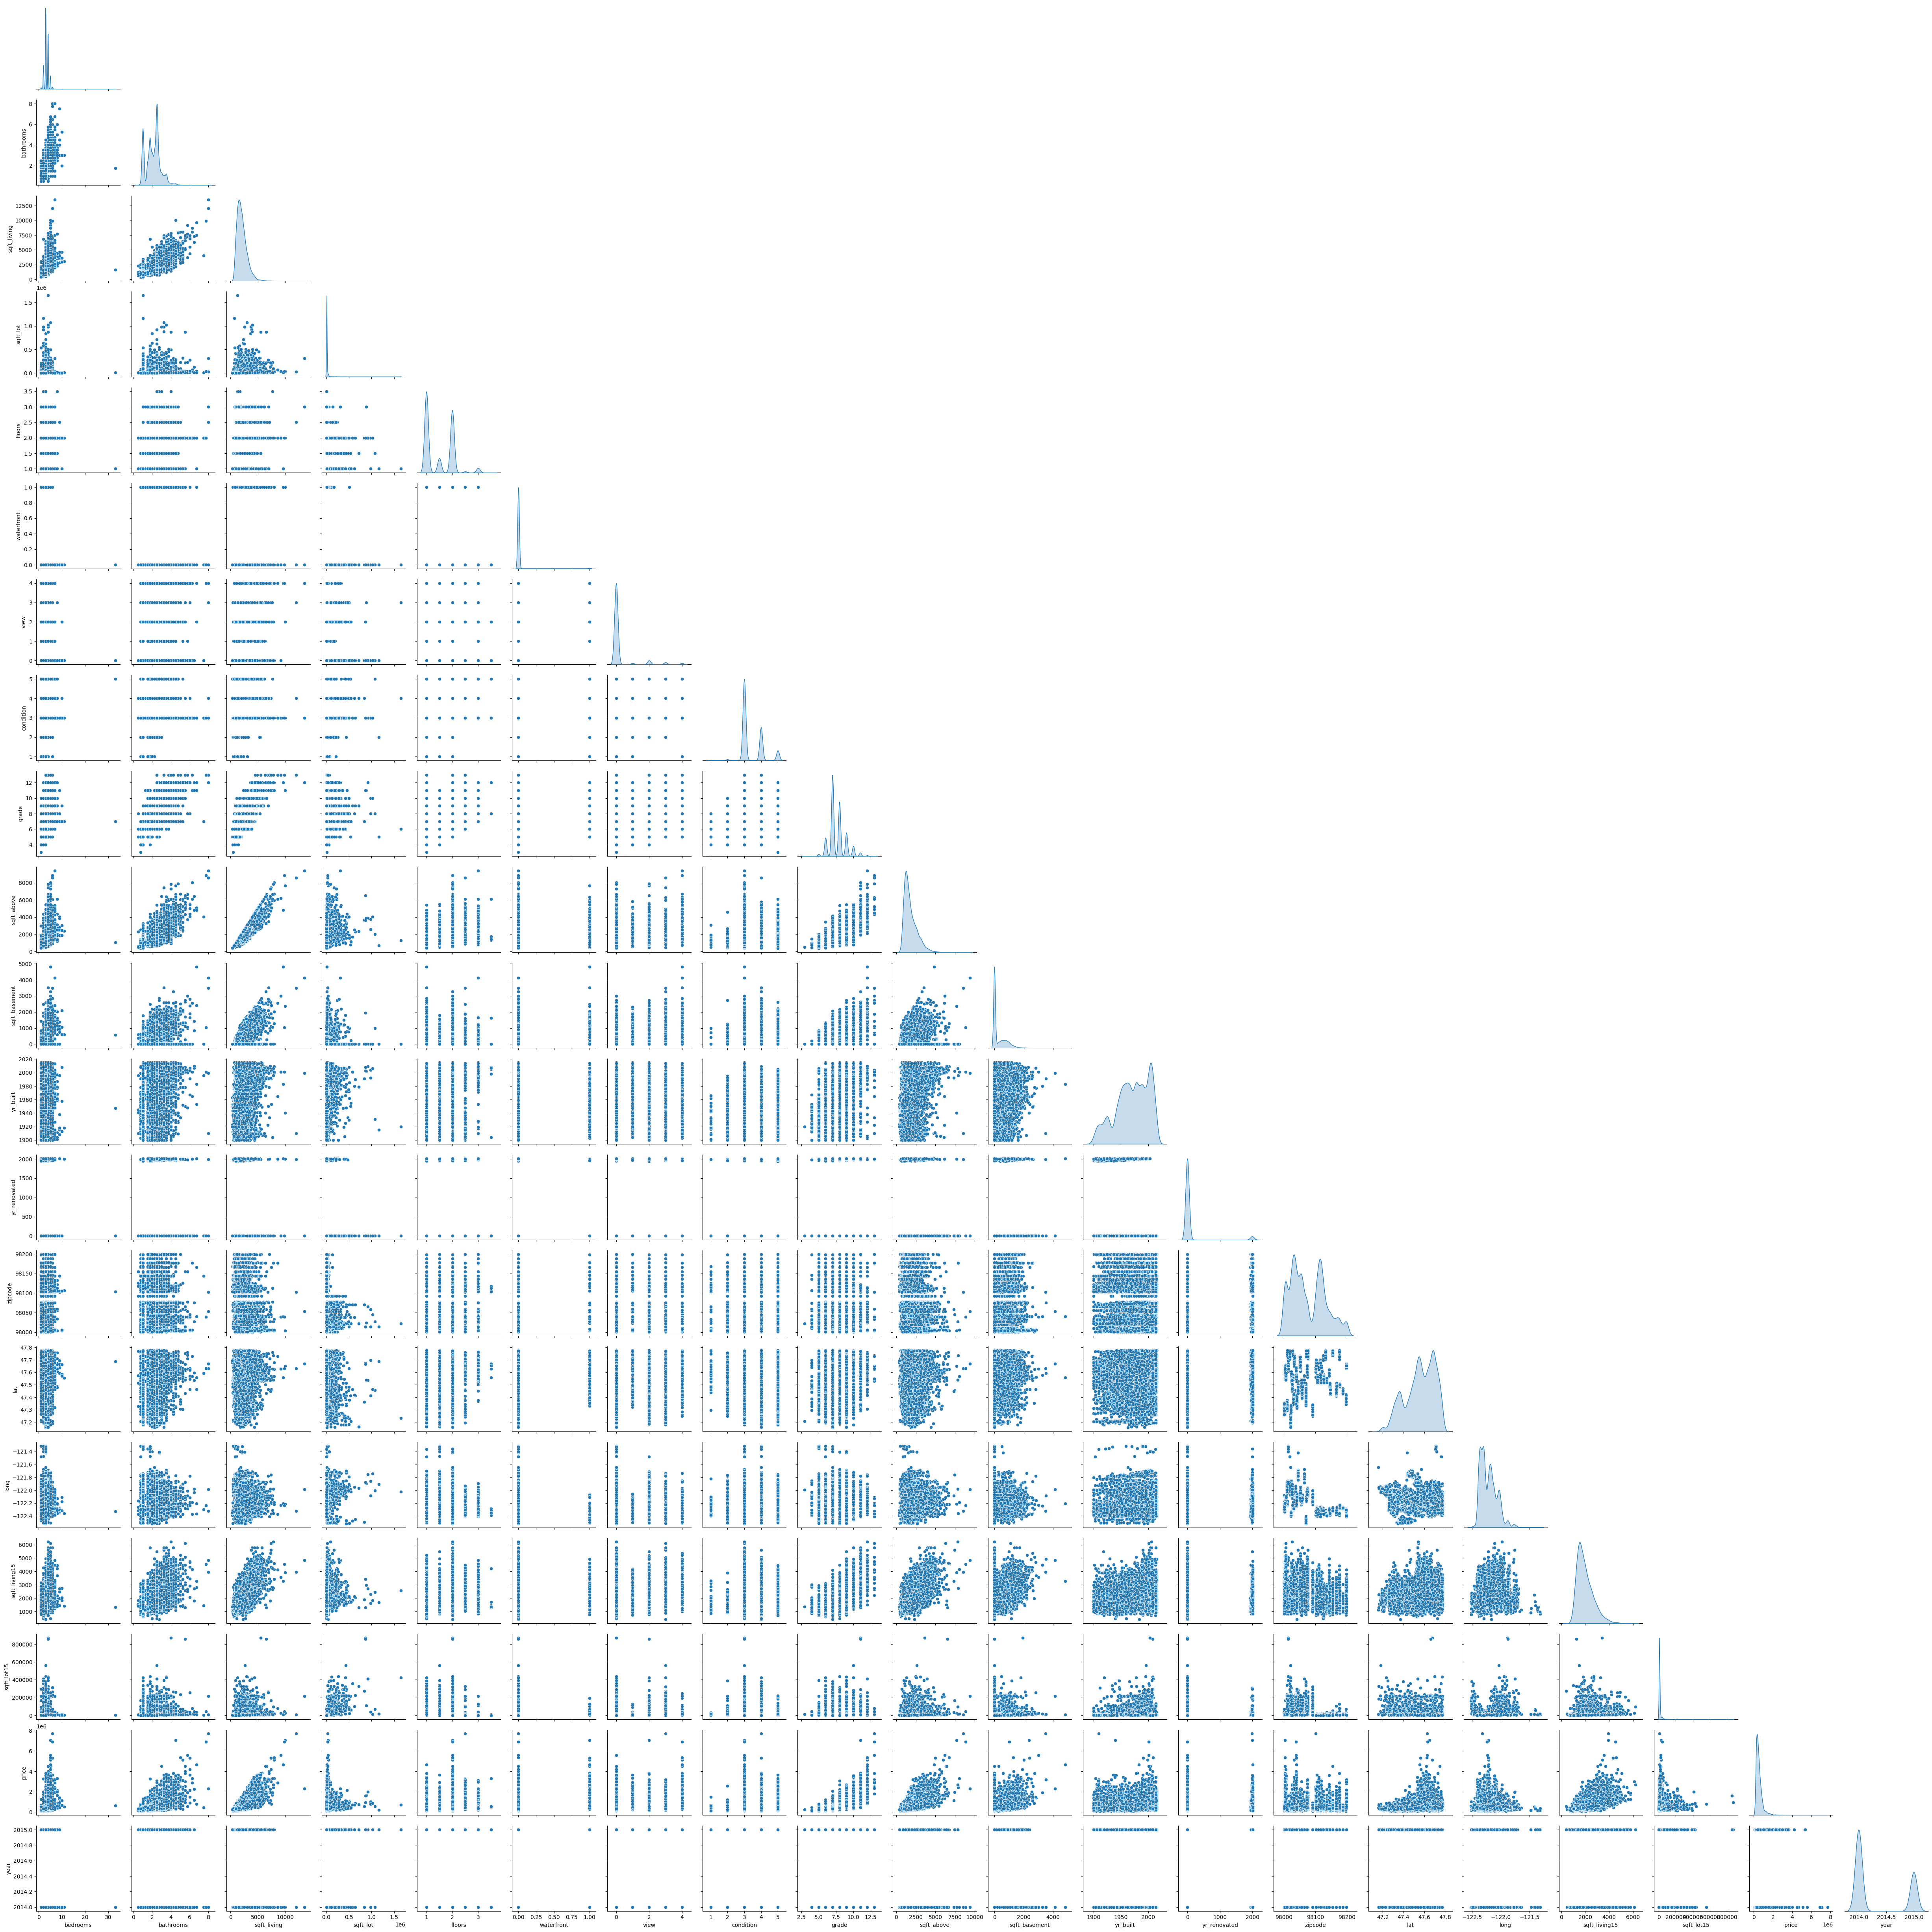

In [47]:
#Se grafica el diagrama de dispersion del nuevo data frame para las variables obtenidas 
sns.pairplot(data3_num, diag_kind='kde', corner=True);

<AxesSubplot: xlabel='sqft_living', ylabel='Density'>

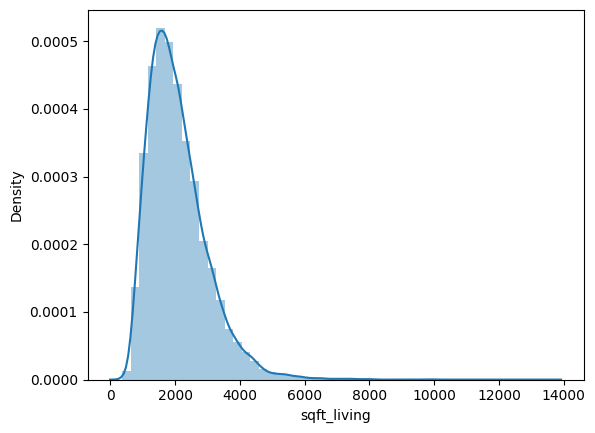

In [48]:
#se grafica una de las variables con mayor relacion al precio 

sns.distplot(data3_num['sqft_living'])

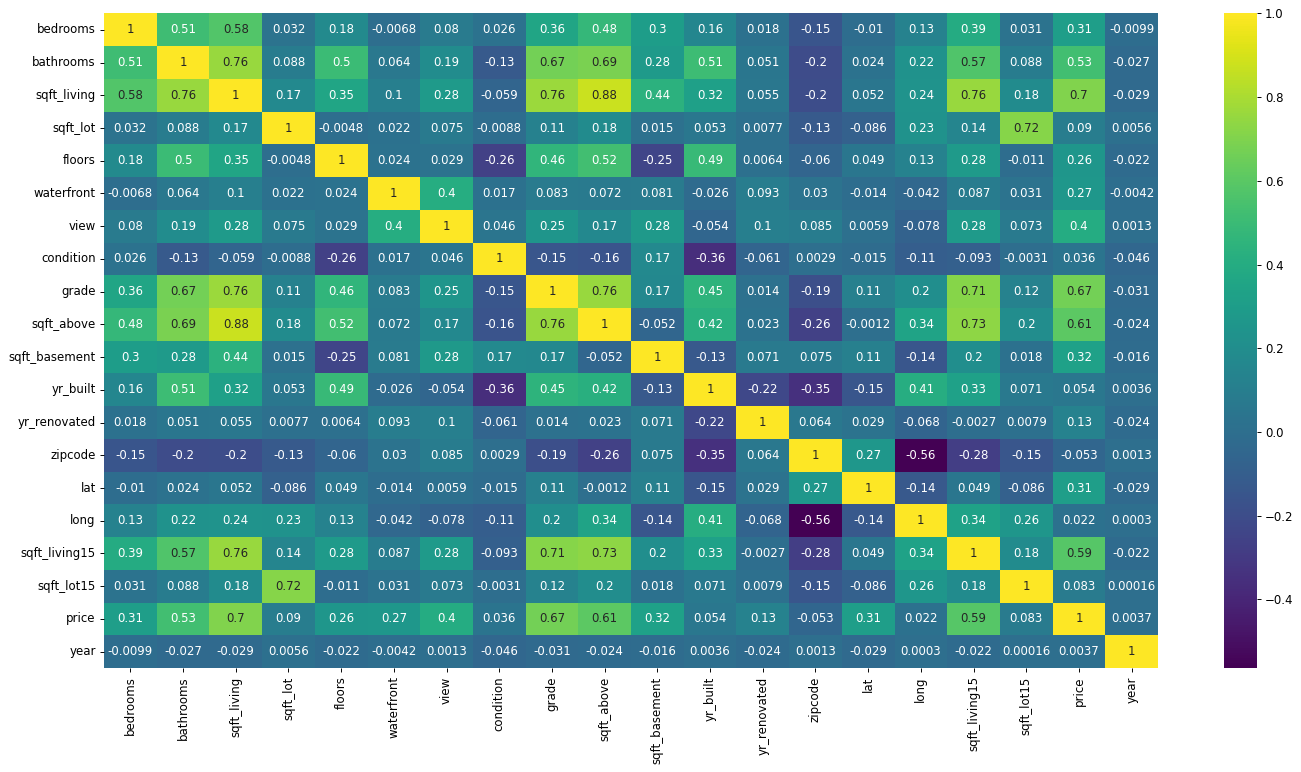

In [49]:
#Calculando la matrix de correlacion de las variables finales, con la data procesada 
plt.figure(figsize=(20,10),dpi =85)
corr_matrix2 = data3_num.corr()

#Plot un heatmap de la matrit de correlacion del nuevo dataframe
corr_matrix2 = data3_num.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='viridis')
plt.show()

<AxesSubplot: >

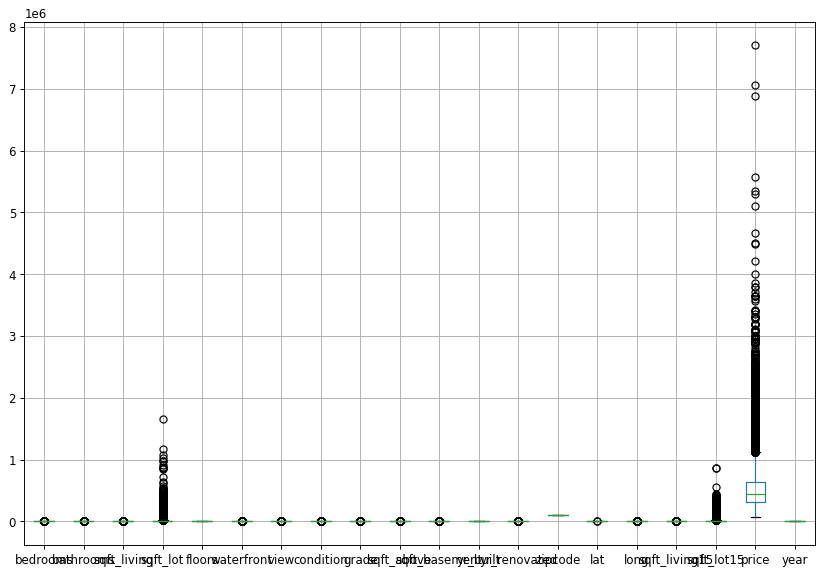

In [50]:
plt.figure(figsize=(12,8),dpi =85)
data3_num.boxplot(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year'])

In [51]:
#Escalar las caracteristicas: StandarScaler de Scikit-learn para escalar las caracteristicas

In [52]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [77]:
y = data3_num['price']
X = data3_num.drop(['price'], axis=1)

In [78]:
X_num = X.select_dtypes(include=np.number)

In [79]:
Standardtransformer = StandardScaler().fit(X_num)
x_standardized = Standardtransformer.transform(X_num)
x_standardized = pd.DataFrame (x_standardized, columns = X_num.columns)
x_standardized.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0 -0.402903  -1.451073    -0.980652 -0.228182 -0.915552   -0.087205 -0.305715   
1 -0.402903   0.174486     0.533369 -0.189739  0.937431   -0.087205 -0.305715   
2 -1.482493  -1.451073    -1.427234 -0.123139 -0.915552   -0.087205 -0.305715   
3  0.676687   1.149821    -0.131057 -0.243878 -0.915552   -0.087205 -0.305715   
4 -0.402903  -0.150626    -0.436040 -0.169503 -0.915552   -0.087205 -0.305715   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0  -0.629986 -0.560800   -0.735251      -0.659031 -0.544678     -0.210210   
1  -0.629986 -0.560800    0.460776       0.244602 -0.680850      4.744842   
2  -0.629986 -1.413190   -1.230575      -0.659031 -1.293626     -0.210210   
3   2.444427 -0.560800   -0.892305       1.396734 -0.204247     -0.210210   
4  -0.629986  0.291589   -0.131197      -0.659031  0.544700     -0.210210   

    zipcode       lat      long  sqft_living15  sqft_lot15      year  
0  1.869645 -0.352894 -0.305695      -0.943676   -0.260627 -0.690667  
1  0.879210  1.161376 -0.746286      -0.432887   -0.187700 -0.690667  
2 -0.933473  1.283355 -0.135144       1.070292   -0.172190  1.447876  
3  1.084772 -0.283604 -1.272151      -0.914488   -0.284459 -0.690667  
4 -0.073850  0.409293  1.200840      -0.272353   -0.192686  1.447876

In [80]:
Standardtransformer = Normalizer().fit(X_num)
x_normalized = Standardtransformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns = X_num.columns)
x_normalized.head()

bedrooms  bathrooms  sqft_living  sqft_lot   floors  waterfront  view  \
0  0.000030   0.000010     0.011972  0.057322  0.00001         0.0   0.0   
1  0.000030   0.000023     0.026007  0.073284  0.00002         0.0   0.0   
2  0.000020   0.000010     0.007782  0.101062  0.00001         0.0   0.0   
3  0.000041   0.000030     0.019905  0.050777  0.00001         0.0   0.0   
4  0.000030   0.000020     0.017008  0.081800  0.00001         0.0   0.0   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.000030  0.000071    0.011972       0.000000  0.019834      0.000000   
1   0.000030  0.000071    0.021959       0.004048  0.019743      0.020148   
2   0.000030  0.000061    0.007782       0.000000  0.019535      0.000000   
3   0.000051  0.000071    0.010663       0.009241  0.019955      0.000000   
4   0.000030  0.000081    0.017008       0.000000  0.020116      0.000000   

    zipcode       lat      long  sqft_living15  sqft_lot15      year  
0  0.996064  0.000482 -0.001240       0.013595    0.057322  0.020433  
1  0.992962  0.000483 -0.001238       0.017102    0.077302  0.020380  
2  0.990693  0.000482 -0.001235       0.027489    0.081476  0.020364  
3  0.996614  0.000483 -0.001243       0.013811    0.050777  0.020453  
4  0.992878  0.000482 -0.001236       0.018223    0.075959  0.020399

<AxesSubplot: >

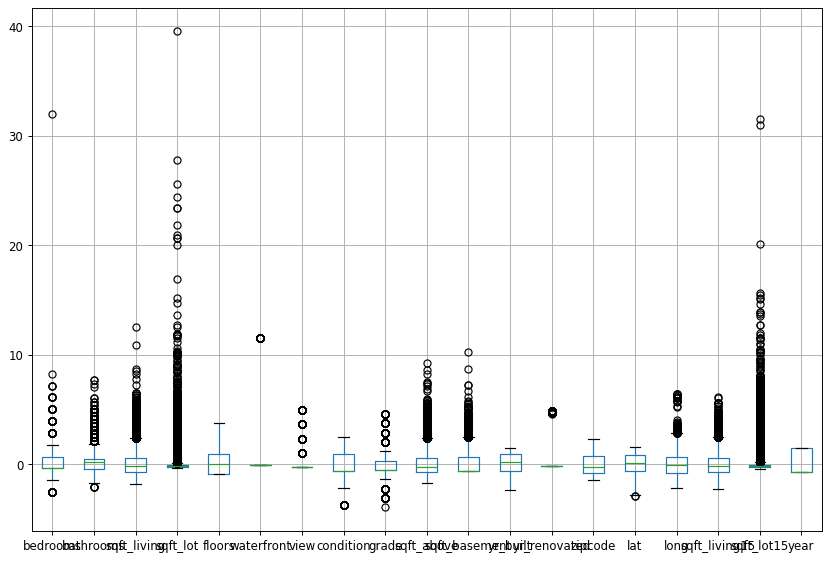

In [81]:
plt.figure(figsize=(12,8),dpi =85)
x_standardized.boxplot(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15','year'])

In [82]:
y= x_standardized 
X= x_standardized

In [83]:
# Splitting into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5) 

In [84]:
#Dividir los datos para el entrenamiento y conjunto de prueba , utilizacion de evaluacion del rendimiento del modelo 
#Train_test_split

In [85]:
# Haciendo el modelo lineal, con una regresión
lm= linear_model.LinearRegression()

#se ajuta el modelo 

model = lm.fit(X_test, y_test)

In [86]:
predictions = lm.predict(X_test)

# Aqui calculamos el rsquared que nos dice que tanto se aproximan los datos reales a la recta calculada
r2_score(y_test, predictions)


1.0

In [87]:
# Mean-squared-error (MSE)
mse = mean_squared_error(y_test, predictions)
mse

1.4981114668223277e-29

In [88]:
# RMSE
rmse = math.sqrt(mse)
rmse

3.870544492474318e-15

In [89]:
# R2
r2 = r2_score(y_test, predictions)
r2 

1.0

In [90]:
# Haciendo el modelo lineal, con una regresión
lm_train= linear_model.LinearRegression()

# Aqui ya ajustamos la maquinaria previa

model_train = lm_train.fit(X_train, y_train)

In [91]:
predictions_train = lm_train.predict(X_train)

# Aqui calculamos el rsquared que nos dice que tanto se aproximan los datos reales a la recta calculada
r2_score(y_train, predictions_train)

1.0

In [92]:
# Mean-squared-error (MSE)
mse_train = mean_squared_error(y_train, predictions_train)
mse_train

5.436604576659727e-29

In [93]:
# RMSE
rmse_train = math.sqrt(mse_train)
rmse_train

7.373333422991074e-15

In [94]:
# R2
r2_train= r2_score(y_train, predictions_train)
r2_train

1.0

In [95]:
predictions_train 

array([[ 0.67668712,  0.49959749,  0.58783035, ...,  0.8659764 ,
        -0.19525264,  1.44787571],
       [-0.40290302, -0.4757376 ,  0.30463213, ..., -0.47666864,
        -0.3188144 , -0.69066702],
       [-0.40290302,  0.49959749,  0.17392526, ...,  0.72003673,
        -0.28379912, -0.69066702],
       ...,
       [-1.48249316, -0.80084929, -1.4272339 , ..., -0.92908165,
        -0.43423648, -0.69066702],
       [ 1.75627726, -0.4757376 , -0.08748848, ...,  0.51572117,
        -0.1366983 ,  1.44787571],
       [ 0.67668712, -0.80084929, -0.32711774, ..., -0.92908165,
        -0.17193357, -0.69066702]])

In [99]:
X['sqft_living']

0       -0.980652
1        0.533369
2       -1.427234
3       -0.131057
4       -0.436040
           ...   
21592   -0.599424
21593    0.250171
21594   -1.154928
21595   -0.523178
21596   -1.154928
Name: sqft_living, Length: 21597, dtype: float64

In [100]:
print(data.loc[100])

id                        1952200240
date             2014-06-11 00:00:00
bedrooms                           3
bathrooms                        2.5
sqft_living                     2070
sqft_lot                       13241
floors                           1.5
waterfront                         0
view                               0
condition                          5
grade                              9
sqft_above                      1270
sqft_basement                    800
yr_built                        1910
yr_renovated                       0
zipcode                        98102
lat                          47.6415
long                        -122.315
sqft_living15                   2200
sqft_lot15                      4500
price                         850830
Name: 100, dtype: object


In [101]:
print(data.loc[1])

id                        6414100192
date             2014-12-09 00:00:00
bedrooms                           3
bathrooms                       2.25
sqft_living                     2570
sqft_lot                        7242
floors                           2.0
waterfront                         0
view                               0
condition                          3
grade                              7
sqft_above                      2170
sqft_basement                    400
yr_built                        1951
yr_renovated                    1991
zipcode                        98125
lat                           47.721
long                        -122.319
sqft_living15                   1690
sqft_lot15                      7639
price                         538000
Name: 1, dtype: object


In [104]:
dataBase = datacol_num[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day']]
dataBase

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
0               0     0          3      7  ...             0    98178   
1               0     0          3      7  ...          1991    98125   
2               0     0          3      6  ...             0    98028   
3               0     0          5      7  ...             0    98136   
4               0     0          3      8  ...             0    98074   
...           ...   ...        ...    ...  ...           ...      ...   
21592           0     0          3      8  ...             0    98103   
21593           0     0          3      8  ...             0    98146   
21594           0     0          3      7  ...             0    98144   
21595           0     0          3      8  ...             0    98027   
21596           0     0          3      7  ...             0    98144   

           lat     long  sqft_living15  sqft_lot15   price  year  month  day  
0      47.5112 -122.257           1340        5650  221900  2014     10   13  
1      47.7210 -122.319           1690        7639  538000  2014     12    9  
2      47.7379 -122.233           2720        8062  180000  2015      2   25  
3      47.5208 -122.393           1360        5000  604000  2014     12    9  
4      47.6168 -122.045           1800        7503  510000  2015      2   18  
...        ...      ...            ...         ...     ...   ...    ...  ...  
21592  47.6993 -122.346           1530        1509  360000  2014      5   21  
21593  47.5107 -122.362           1830        7200  400000  2015      2   23  
21594  47.5944 -122.299           1020        2007  402101  2014      6   23  
21595  47.5345 -122.069           1410        1287  400000  2015      1   16  
21596  47.5941 -122.299           1020        1357  325000  2014     10   15  

[21597 rows x 23 columns]

In [105]:
#Base definitiva convertir a csv
dataBase.to_csv('C:/Users/Usuario/Ironhack_Irina/MID_Bootcamp_project/MID_Bootcamp_Project/dB_final.csv')
